# Assignment #3


Deep Learning / Fall 1398, Iran University of Science and Technology



---



**Please pay attention to these notes:**

<br/>
- **Assignment Due: ** xxxx/xx/xx 23:59
- If you need any additional information, please review the assignment page on the course website.
- The items you need to answer are highlighted in red and the coding parts you need to implement are denoted by:
```
########################################
#     Put your implementation here     #
########################################
```
- We always recommend co-operation and discussion in groups for assignments. However, each student has to finish all the questions by himself/herself. If our matching system identifies any sort of copying, you'll be responsible for consequences. So, please mention his/her name if you have a team-mate.
- Students who audit this course should submit their assignments like other students to be qualified for attending the rest of the sessions.
- Finding any sort of copying will zero down that assignment grade and also will be counted as two negative assignment for your final score.
- When you are ready to submit, please follow the instructions at the end of this notebook.
- If you have any questions about this assignment, feel free to drop us a line. You may also post your questions on the course Forum page.
- You must run this notebook on Google Colab platform, it depends on Google Colab VM for some of its dependencies.
- **Before starting to work on the assignment Please fill your name in the next section *AND Remember to RUN the cell.* **

<br/>


Assignment Page: [https://iust-deep-learning.github.io/981/assignments/03_transfer_learning_and_sequence_to_sequence_models](https://iust-deep-learning.github.io/981/assignments/03_transfer_learning_and_sequence_to_sequence_models)

Course Forum: [https://groups.google.com/forum/#!forum/dl981/](https://groups.google.com/forum/#!forum/dl981/)


---



Fill your information here & run the cell

In [21]:
#@title Enter your information & "RUN the cell!!" { run: "auto" }
student_id =  95522031#@param {type:"integer"}
student_name = "AmirMahdi Nikukaran" #@param {type:"string"}
Your_Github_account_Email = "amirmahdinikoukaran@gmail.com" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)


from pathlib import Path

ASSIGNMENT_PATH = Path('asg03')
ASSIGNMENT_PATH.mkdir(parents=True, exist_ok=True)

your student id: 95522031
your name: AmirMahdi Nikukaran


# Transfer learning warm up

Pre-trained networks are networks that are already trained and stored using a lot of data. We use these networks because:
- Our data is usually not very large.
- We do not need to start the training process from scratch.


Usually, first layers in deep networks extract general features, and as we move forward in the layers, the network learns patterns more specific to the task. So if we freeze the first layers and update the weights of the last layers according to your data, the network can better learn the patterns in our data for a particular task in less time and using relatively low data.

We now want to separate ambulance classes and ordinary cars using the VGG network. To do this, we use the data you generated for the previous assignment. You must generate those data in this assignment again and split the dataset into train and test.


In [22]:
! pip install google_images_download

     |████████████████████████████████| 911kB 3.8MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=c0ad1ae3e6ded61c41cab1bfbe55ca2b54783bdfabd4c6036e4fa6a47b477342
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [23]:
! sudo apt-get install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 7 not upgraded.
Need to get 72.7 MB of archives.
After this operation, 259 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 79.0.3945.79-0ubuntu0.18.04.1 [1,079 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 79.0

In [0]:
  ########################################
  #             get dataset              #
  ########################################

In [25]:
! googleimagesdownload -k "buses" -s medium -l 125 -i permitted --chromedriver '/usr/lib/chromium-browser/chromedriver'


Item no.: 1 --> Item name = buses
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.sprinter.jpg
Completed Image ====> 2.total-chicago-image.jpg
Completed Image ====> 3.1860x1050-volvo-buses-transdev-pressrelease-newsintro.jpg
Completed Image ====> 4.p07l3b94.jpg
Completed Image ====> 5.1000x-1.jpg
Completed Image ====> 6.110619_White_Plains_ebus.jpg
Completed Image ====> 7.WMATA_Metroway-729x364.jpg
Completed Image ====> 8.Untitled-design-2019-09-05T103414.053.png
Completed Image ====> 9.ebuscoverphoto.png
Completed Image ====> 10.88092d1a5f164aa9bb93f08c0aa380091.jpg
Completed Image ====> 11.one-of-septa-s-new-electric-buses-darryl-murphy.original-768x593.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 12.trinity_transportation_school_bus.jpg
Completed Image ====> 13.NF-fuel-cell-bus-1024x683.jpg
Completed Image ====> 14.TBB_PU_July19_Jouley.jpg
Completed Image ====> 15.c

In [26]:
! googleimagesdownload -k "ambulances" -s medium -l 125 -i permitted --chromedriver '/usr/lib/chromium-browser/chromedriver'


Item no.: 1 --> Item name = ambulances
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.erase.26.jpg
Completed Image ====> 2.blogambulance.jpg
Completed Image ====> 3.web1_Ambulance2.jpg
Completed Image ====> 4.merlin_133369826_d9991233-cbf8-4b7c-a183-5887613107e9-articleLarge.jpg
Completed Image ====> 5.960x0.jpg
Completed Image ====> 6.austin-travis-county-ems-ambulances-offer-eye-catching-effective-locations-intersection-clearance-850x588.jpeg
Completed Image ====> 7.image.jpg
Completed Image ====> 8.Ambulance-Main-Banner-Image-5-1024x541.jpg
Completed Image ====> 9.6925619739_e1885e91c7_b-1024x646.jpg
Completed Image ====> 10.9ea10057dddbd76ad39d18fb6aa93b90.jpg
Completed Image ====> 11._105896422_ambulance_chrisradburnpa.jpg
Completed Image ====> 12.FA110419-Firstar1.jpg
Completed Image ====> 13.2-5.gif
Completed Image ====> 14.ambulances.jpg
Completed Image ====> 15.1519379748-unit_before.

In [27]:
! googleimagesdownload -k "police cars" -s medium -l 125 -i permitted --chromedriver '/usr/lib/chromium-browser/chromedriver'


Item no.: 1 --> Item name = police cars
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Invalid or missing image format. Skipping...
Completed Image ====> 1.ZZRP4JQJOFH65PXTCAFXMHOTBQ.JPG
Completed Image ====> 2.0a958aa8-53a6-48fd-b0ae-a19d6e3b9820-large16x9_STEPHEN1355_frame_241.png
Completed Image ====> 3.PoliceInterceptCon_01.jpg
Completed Image ====> 4.cq5dam.web.1280.1280.jpeg
Completed Image ====> 5.FZDB5OTTO5FFJNU7LUXZFSNONI.jpg
Completed Image ====> 6.30xp-tesla-articleLarge.jpg
Completed Image ====> 7.c6916f3b72039dc258f8f4e910deb738.jpg
Completed Image ====> 8.1385919585004-P-Ohio-State-1-.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 9.police-responder-hybrid-sedan-9.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 10.1b8de8fd-fc55-48b9-b49f-9592290ce9cc-A-B_Tech_cop_car.jpg
Completed Image ====> 11.hqdefault.jpg
Completed Image ====> 12.In-God-We-Trust.jpg
Com

In [28]:
! googleimagesdownload -k "fire trucks" -s medium -l 125 -i permitted --chromedriver '/usr/lib/chromium-browser/chromedriver'


Item no.: 1 --> Item name = fire trucks
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.voertuig-chemie-reus.jpeg
Completed Image ====> 2.20190807olk06.jpg
Completed Image ====> 3.5c40bc62b1af0.image.jpg
Completed Image ====> 4.32588721_H25534555-720x445.jpg
Completed Image ====> 5.920x920.jpg
Completed Image ====> 6.g9a9m-EE02SHTBAEY-Full-Image_GalleryBackground-en-US-1510680720275._SX1080_.jpg
Completed Image ====> 7.920x920.jpg
Completed Image ====> 8.Pierce_Saber_Custom_Chassis_with_Ford_PowerStroke_Turbo_Diesel_Power_Train_qay33n.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 9.pierce-indianapolis-__-720x516-s.jpg
Completed Image ====> 10.1607FA_Adams1.jpg
Completed Image ====> 11.1429216774-fireengines-highresolution.png
Completed Image ====> 12.2583_LadderTruck2-e1536353643879-1024x576.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 13.banne

In [29]:
! googleimagesdownload -k "car,lux car" -s medium -l 250 -i banned --chromedriver '/usr/lib/chromium-browser/chromedriver'


Item no.: 1 --> Item name = car
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.what-causes-new-car-smell-1-original.jpg
Completed Image ====> 2.Motors2020_Audi_Q3_large.jpg
Completed Image ====> 3.k8519lf8_bugatti-centodieci-unveiled-at-pebble-beach-car-show_625x300_17_August_19.jpg
Completed Image ====> 4.960x0.jpg
IOError on an image...trying next one... Error: The read operation timed out
Completed Image ====> 5.911-road-3629a.jpg
Completed Image ====> 6.02-toyota-corolla-2020-angle--exterior--front--grey-e1569431125507.jpg
Completed Image ====> 7.637873-tesla-model-s-2019-640x360.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 8.MY19-Insight-side-profile-992x428.png
Completed Image ====> 9.ferrari-halo.jpg
Completed Image ====> 10.large-2479-s-classsaloon.jpg
Completed Image ====> 11.2020-MotorTrend-SUV-of-the-Year-contenders-1.jpg
Completed Image ====> 12.SONATA-her

In [30]:
import os
from sklearn.model_selection import train_test_split

images = {'train': [], 'test': []} # Put the images here
labels = {'train': [], 'test': []} # Put the labels here

total_images = [os.path.join("downloads/permitted/", img) for img in os.listdir("downloads/permitted/")] + [os.path.join("downloads/banned/", img) for img in os.listdir("downloads/banned/")]
total_labels = [0 for img in os.listdir("downloads/permitted/")] + [1 for img in os.listdir("downloads/banned/")]
images['train'], images['test'], labels['train'], labels['test'] = train_test_split(total_images, total_labels, test_size = 0.2, random_state = 0)
print(images['train'])
print(images['test'])
print(labels['train'])
print(labels['test'])

['downloads/banned/7.Lux.png', 'downloads/banned/235.Lyft-Launches-A-Black-Car-Service-Called-Lux.png', 'downloads/permitted/62.8DC16763-C296-B24F-6B79B20091D72A63.jpg', 'downloads/banned/1.what-causes-new-car-smell-1-original.jpg', 'downloads/banned/16.img_7597-e1553613539674.jpg', 'downloads/banned/181.buy-a-car-1.png', 'downloads/banned/231.Car-Inventory.jpg', 'downloads/banned/23.heres-why-the-mclaren-720s-worth-280000-is-a-difficult-car-to-love.jpg', 'downloads/banned/27.10-Future-Classics-gear-patrol-lead-feature.jpg', 'downloads/banned/76.range-rover-velar.jpg', 'downloads/permitted/49.5458620_081019-bronxambulancecrash2.jpg', 'downloads/banned/96.polo-galery-2-lux-car-rental.jpg', 'downloads/permitted/74.1411001101000-0917-dpd-car01_3369887_ver1.0.jpg', 'downloads/banned/183.512_V20161020180738.jpg', 'downloads/banned/131.2019-vinfast-lux-a2-0-2018-paris-auto-show_100673387_l.jpg', 'downloads/banned/96.New%20Flying%20Spur%20emotive%20studio%20test%20image%201024x576.jpg', 'down

In [0]:
from PIL import Image
import shutil
os.mkdir("train")
os.mkdir("test")
os.mkdir("train/permitted")
os.mkdir("test/permitted")
os.mkdir("train/banned")
os.mkdir("test/banned")
for img in images['train']:
  try:
    f = Image.open(img)
    f.close()
    if(img.split("/")[1] == "permitted"):
      dest = shutil.copy(img, "train/permitted/" + img.split("/")[2])
    elif(img.split("/")[1] == "banned"):
      dest = shutil.copy(img, "train/banned/" + img.split("/")[2])
  except:
    continue
for img in images['test']:
  try:
    f = Image.open(img)
    f.close()
    if(img.split("/")[1] == "permitted"):
      dest = shutil.copy(img, "test/permitted/" + img.split("/")[2])
    elif(img.split("/")[1] == "banned"):
      dest = shutil.copy(img, "test/banned/" + img.split("/")[2])
  except:
    continue

In [32]:
for i in range(len(images['train'])):
  if(images['train'][i].split("/")[1] == "permitted"):
    images['train'][i] = os.path.join("train/permitted/", images['train'][i].split("/")[2])
  elif(images['train'][i].split("/")[1] == "banned"):
    images['train'][i] = os.path.join("train/banned/", images['train'][i].split("/")[2])
for i in range(len(images['test'])):
  if(images['test'][i].split("/")[1] == "permitted"):
    images['test'][i] = os.path.join("test/permitted/", images['test'][i].split("/")[2])
  elif(images['test'][i].split("/")[1] == "banned"):
    images['test'][i] = os.path.join("test/banned/", images['test'][i].split("/")[2])
print(images['train'])
print(images['test'])
print(len(images['train']))
print(len(images['test']))

['train/banned/7.Lux.png', 'train/banned/235.Lyft-Launches-A-Black-Car-Service-Called-Lux.png', 'train/permitted/62.8DC16763-C296-B24F-6B79B20091D72A63.jpg', 'train/banned/1.what-causes-new-car-smell-1-original.jpg', 'train/banned/16.img_7597-e1553613539674.jpg', 'train/banned/181.buy-a-car-1.png', 'train/banned/231.Car-Inventory.jpg', 'train/banned/23.heres-why-the-mclaren-720s-worth-280000-is-a-difficult-car-to-love.jpg', 'train/banned/27.10-Future-Classics-gear-patrol-lead-feature.jpg', 'train/banned/76.range-rover-velar.jpg', 'train/permitted/49.5458620_081019-bronxambulancecrash2.jpg', 'train/banned/96.polo-galery-2-lux-car-rental.jpg', 'train/permitted/74.1411001101000-0917-dpd-car01_3369887_ver1.0.jpg', 'train/banned/183.512_V20161020180738.jpg', 'train/banned/131.2019-vinfast-lux-a2-0-2018-paris-auto-show_100673387_l.jpg', 'train/banned/96.New%20Flying%20Spur%20emotive%20studio%20test%20image%201024x576.jpg', 'train/permitted/116.559a715e-6973-464d-8628-d11e84939713-large16x9_2

	
Now at first, we need to declare a VGG modal to extract the image features. You can see the structure and layers of the network below.
A pre-trained model can extract the features of an image itself. So at first, please do this classification task just with Features extracted from the VGG model.

In [33]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "train",
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory("test", 
                                                        target_size=(150, 150), 
                                                        batch_size=20, 
                                                        class_mode='binary')

Using TensorFlow backend.


Found 792 images belonging to 2 classes.
Found 195 images belonging to 2 classes.


In [34]:
from keras.applications import VGG16
from keras.preprocessing import image
import numpy as np

vgg16_model = VGG16(weights='imagenet', include_top=False)
vgg16_model.summary()

xs = {'train': [], 'test': []}
for i in range(len(train_generator)):
  for img in train_generator[i][0]:
    img = np.expand_dims(img, axis=0)
    features = vgg16_model.predict(img)
    ff = features.flatten()
    xs['train'].append(ff)

for i in range(len(validation_generator)):
  for img in validation_generator[i][0]:
    img = np.expand_dims(img, axis=0)
    features = vgg16_model.predict(img)
    ff = features.flatten()
    xs['test'].append(ff)

ys = {'train': [], 'test': []}
for i in range(len(train_generator)):
  for lbl in train_generator[i][1]:
    ys['train'].append(lbl)
for i in range(len(validation_generator)):
  for lbl in validation_generator[i][1]:
    ys['test'].append(lbl)






58892288/58889256 [==============================] - 5s 0us/step






Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
____________________________________________________

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [35]:
print(np.shape(xs['train']))
print(np.shape(xs['test']))
train_features = np.reshape(xs['train'], (-1, 4 * 4 * 512))
validation_features = np.reshape(xs['test'], (-1, 4 * 4 * 512))
train_labels = np.reshape(ys['train'], (-1))
validation_labels = np.reshape(ys['test'], (-1))
print(np.shape(train_features))
print(np.shape(validation_features))
print(np.shape(train_labels))
print(np.shape(validation_labels))

(792, 8192)
(195, 8192)
(792, 8192)
(195, 8192)
(792,)
(195,)


Finally, implement a simple Keras model to the classification of these images.

In [36]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=8192))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))
model.save(ASSIGNMENT_PATH /'P1_1.h5')


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 792 samples, validate on 195 samples
Epoch 1/30
792/792 [==============================] - 0s 507us/step - loss: 0.7263 - acc: 0.5745 - val_loss: 0.571

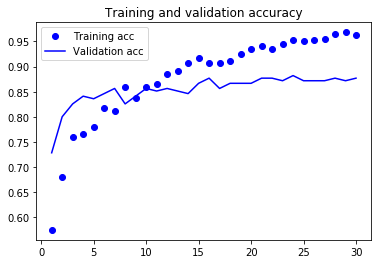

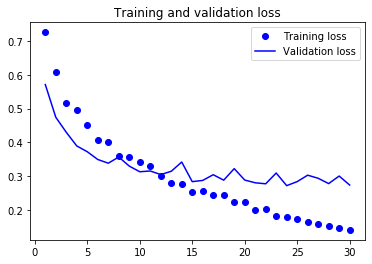

In [37]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Next, you need to do this task with fine-tuned model. How many layers of model do you think you need to update according to your data?

Now implement fine-tuning on the model and repeat classifying data with the same model as the previous part. 

In [38]:
from keras.applications import VGG16
from keras.preprocessing import image
import numpy as np

vgg16_model = VGG16(weights='imagenet', include_top=False)
vgg16_model.summary()

xs = {'train': [], 'test': []}
for i in range(len(train_generator)):
  for img in train_generator[i][0]:
    img = np.expand_dims(img, axis=0)
    features = vgg16_model.predict(img)
    ff = features.flatten()
    xs['train'].append(ff)

for i in range(len(validation_generator)):
  for img in validation_generator[i][0]:
    img = np.expand_dims(img, axis=0)
    features = vgg16_model.predict(img)
    ff = features.flatten()
    xs['test'].append(ff)

ys = {'train': [], 'test': []}
for i in range(len(train_generator)):
  for lbl in train_generator[i][1]:
    ys['train'].append(lbl)
for i in range(len(validation_generator)):
  for lbl in validation_generator[i][1]:
    ys['test'].append(lbl)


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [39]:
print(np.shape(xs['train']))
print(np.shape(xs['test']))
train_features = np.reshape(xs['train'], (-1, 4 * 4 * 512))
validation_features = np.reshape(xs['test'], (-1, 4 * 4 * 512))
train_labels = np.reshape(ys['train'], (-1))
validation_labels = np.reshape(ys['test'], (-1))
print(np.shape(train_features))
print(np.shape(validation_features))
print(np.shape(train_labels))
print(np.shape(validation_labels))

(792, 8192)
(195, 8192)
(792, 8192)
(195, 8192)
(792,)
(195,)


In [0]:
from keras.models import load_model

vgg16_model.trainable = True
set_trainable = False

for layer in vgg16_model.layers:
  if layer.name == 'block5_conv1' or layer.name == 'block5_conv2' or layer.name == 'block5_conv3':
    set_trainable = True
    
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [41]:
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers

  ########################################
  #     Put your implementation here     #
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=8192))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))
model.save(ASSIGNMENT_PATH /'P1_2.h5')
  ########################################


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________
Train on 792 samples, validate on 195 samples
Epoch 1/30
792/792 [==============================] - 0s 536us/step - loss: 0.7013 - acc: 0.5934 - val_loss: 0.5063 - val_acc: 0.8359
Epoch 2/30
792/792 [==============================] - 0s 208us/step - loss: 0.5881 - acc: 0.6806 - val_loss: 0.4438 - val_acc: 0.8769
Epoch 3/30
792/792 [==============================] - 0s 197

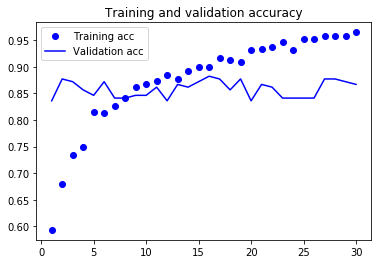

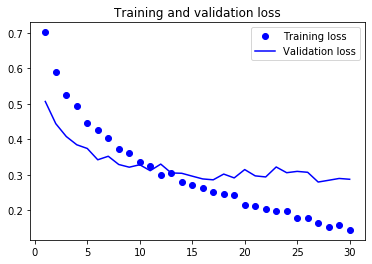

In [42]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 1. Multi objective Sequence to Sequence model

Remember the **Transfer Learning and Sequence to Sequence Model** practical class; you learned how to use a pre-trained model, and how to train a sequence to sequence model. In this task, you are going to build a sequence to sequence model by feeding English characters into your model and predicting French and Persian characters. There are some criteria that you must consider:
1. You have learned about building a character level sequence to sequence model in the [practical class](https://iust-deep-learning.github.io/981/practical/). You can review the full instruction and the code [here](https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html) (We suggest practicing with [this](https://colab.research.google.com/drive/1LS0jeq6glTKoY7zRyQBvbBHmH-jKowZO) notebook before jumping to the answer). For your homework, you must implement a character-level multi-objective sequence to sequence model, which translates English texts to French and Persian Simultaneously. You can learn about building neural networks with multiple outputs [here](https://sanjayasubedi.com.np/deeplearning/multioutput-keras/).  

2. After training the model, you **must** use the prediction and test some samples, as it was provided in your practical class notebook.

3. You **must** use the dataset which was used in your practical class. For Persian translation, you must translate it from the English part by using any translation APIs such as [Google Translate](https://cloud.google.com/translate/docs/).

4. Remember saving all of your trained models under the path 'ASSIGNMENT_PATH /'.


In [0]:
from __future__ import print_function

from keras.models import Model
from keras.layers import Input, LSTM, Dense
import numpy as np

In [44]:
!wget http://www.manythings.org/anki/fra-eng.zip
!sudo apt-get install unzip
!unzip fra-eng.zip

--2020-01-18 11:54:31--  http://www.manythings.org/anki/fra-eng.zip
Resolving www.manythings.org (www.manythings.org)... 104.24.109.196, 104.24.108.196, 2606:4700:3037::6818:6cc4, ...
Connecting to www.manythings.org (www.manythings.org)|104.24.109.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5939832 (5.7M) [application/zip]
Saving to: ‘fra-eng.zip’

fra-eng.zip         100%[===================>]   5.66M  3.61MB/s    in 1.6s    

2020-01-18 11:54:33 (3.61 MB/s) - ‘fra-eng.zip’ saved [5939832/5939832]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Archive:  fra-eng.zip
  inflating: _about.txt              
  inflating: fra.txt                 


In [45]:
!pip install translate

     |████████████████████████████████| 81kB 4.4MB/s 
     |████████████████████████████████| 174kB 58.5MB/s 
     |████████████████████████████████| 3.4MB 5.1MB/s 
     |████████████████████████████████| 102kB 13.1MB/s 
ERROR: pytest 3.6.4 has requirement pluggy<0.8,>=0.5, but you'll have pluggy 0.13.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1


In [0]:
from translate import Translator

In [0]:
batch_size = 64  # Batch size for training.
epochs = 30  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.
# Path to the data txt file on disk.
data_path = 'fra.txt'

In [53]:
# Vectorize the data.
input_texts = []
target_texts = []
persian_texts = []
input_characters = set()
target_characters = set()
persian_characters = set()
with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')
for line in lines[: min(num_samples, len(lines) - 1)]:
    translator = Translator(to_lang="fa")
    input_text, target_text, _ = line.split('\t')
    persian_text = translator.translate(input_text)
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = '\t' + target_text + '\n'
    persian_text = '\t' + persian_text + '\n'
    input_texts.append(input_text)
    target_texts.append(target_text)
    persian_texts.append(persian_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
            print(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)
            print(char)
    for char in persian_text:
        if char not in persian_characters:
            persian_characters.add(char)
            print(char)

G
o
.
	
V
a
 
!


	
M
Y
E
O
R
 
W
A
N
I
G
:
U
S
D
L
V
B
F
T
.
X
1
H
0
C
P
/


H
i
S
l
u
t
.
R
u
n
!
C
o
r
s
 
e
z
5
9
W
h
?
Q
i
?
w
Ç
8
F
r
e
A
f
7
l
p
À
'
d
J
m
6
S
t
p
ê
-
a
n
4
 
P
3
v
2
B
j
I
s
J
c
m
y
y
g
é
’
O
O
h
A
c
k
q
C
M
T
L
è
,
g
b
f
d
'
1
9
1
9
K
L
É
N
I
E
ç
x
H
T
N
â
D
à
F
B
 
D
R
b
q
z
v
G
M
,
P
ô
î
û
Y
 
x
j
U
U
E
$
5
k
K
3
:
0
8
8
3
0
V
Ê
7
:
«
»
ù
œ
ï
5
Y
&
&
%
%
-
(
)
2
2
Q
$
ë
6


In [54]:
for char in input_characters:
        if char not in persian_characters:
            persian_characters.add(char)
input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
persian_characters = sorted(list(persian_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
num_decoder_persians = len(persian_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])
max_decoder_seq_length_persian = max([len(txt) for txt in persian_texts])

print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Number of unique persian tokens:', num_decoder_persians)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)
print('Max sequence length for persians:', max_decoder_seq_length_persian)

Number of samples: 10000
Number of unique input tokens: 70
Number of unique output tokens: 93
Number of unique persian tokens: 75
Max sequence length for inputs: 16
Max sequence length for outputs: 59
Max sequence length for persians: 196


In [0]:
input_token_index = dict(
    [(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict(
    [(char, i) for i, char in enumerate(target_characters)])
persian_token_index = dict(
    [(char, i) for i, char in enumerate(persian_characters)])

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_input_persian = np.zeros(
    (len(input_texts), max_decoder_seq_length_persian, num_decoder_persians),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_persian = np.zeros(
    (len(input_texts), max_decoder_seq_length_persian, num_decoder_persians),
    dtype='float32')

In [0]:
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    encoder_input_data[i, t + 1:, input_token_index[' ']] = 1.
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.
    decoder_input_data[i, t + 1:, target_token_index[' ']] = 1.
    decoder_target_data[i, t:, target_token_index[' ']] = 1.
for i, (input_text, persian_text) in enumerate(zip(input_texts, persian_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    encoder_input_data[i, t + 1:, input_token_index[' ']] = 1.
    for t, char in enumerate(persian_text):
        # decoder_target_persian is ahead of decoder_input_persian by one timestep
        decoder_input_persian[i, t, persian_token_index[char]] = 1.
        if t > 0:
            # decoder_target_persian will be ahead by one timestep
            # and will not include the start character.
            decoder_target_persian[i, t - 1, persian_token_index[char]] = 1.
    decoder_input_persian[i, t + 1:, persian_token_index[' ']] = 1.
    decoder_target_persian[i, t:, persian_token_index[' ']] = 1.

In [0]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_inputs_persian = Input(shape=(None, num_decoder_persians))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_lstm_persian = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_persians, _, _ = decoder_lstm_persian(decoder_inputs_persian,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_dense_persians = Dense(num_decoder_persians, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
decoder_persians = decoder_dense_persians(decoder_persians)

In [58]:
# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs, decoder_inputs_persian], [decoder_outputs, decoder_persians])

# Run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit([encoder_input_data, decoder_input_data, decoder_input_persian], [decoder_target_data, decoder_target_persian],
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)
# Save model
model.save(ASSIGNMENT_PATH /'P2.h5')

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 46s 6ms/step - loss: 3.8691 - dense_5_loss: 1.1565 - dense_6_loss: 2.7125 - dense_5_acc: 0.7267 - dense_6_acc: 0.2283 - val_loss: 3.1707 - val_dense_5_loss: 1.0567 - val_dense_6_loss: 2.1140 - val_dense_5_acc: 0.6997 - val_dense_6_acc: 0.4146
Epoch 2/30
8000/8000 [==============================] - 45s 6ms/step - loss: 2.2264 - dense_5_loss: 0.8353 - dense_6_loss: 1.3912 - dense_5_acc: 0.7740 - dense_6_acc: 0.6269 - val_loss: 1.6242 - val_dense_5_loss: 0.8330 - val_dense_6_loss: 0.7912 - val_dense_5_acc: 0.7650 - val_dense_6_acc: 0.8747
Epoch 3/30
8000/8000 [==============================] - 44s 6ms/step - loss: 1.0912 - dense_5_loss: 0.6749 - dense_6_loss: 0.4163 - dense_5_acc: 0.8088 - dense_6_acc: 0.9392 - val_loss: 0.9138 - val_dense_5_loss: 0.7269 - val_dense_6_loss: 0.1869 - val_dense_5_acc: 0.7907 - val_dense_6_acc: 0.9709
Epoch 4/30
8000/8000 [==============================] -

In [0]:
# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

# Define sampling models
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_persians, state_h_persian, state_c_persian = decoder_lstm_persian(decoder_inputs_persian,
                                     initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_states_persian = [state_h_persian, state_c_persian]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_persians = decoder_dense_persians(decoder_persians)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)
decoder_model_persian = Model(
    [decoder_inputs_persian] + decoder_states_inputs,
    [decoder_persians] + decoder_states_persian)

# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())
reverse_persian_char_index = dict(
    (i, char) for char, i in persian_token_index.items())

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [0]:
def decode_sequence_persian(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty persian sequence of length 1.
    persian_seq = np.zeros((1, 1, num_decoder_persians))
    # Populate the first character of persian sequence with the start character.
    persian_seq[0, 0, persian_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence_persian = ''
    while not stop_condition:
        persian_tokens, h, c = decoder_model_persian.predict(
            [persian_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(persian_tokens[0, -1, :])
        sampled_char = reverse_persian_char_index[sampled_token_index]
        decoded_sentence_persian += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence_persian) > max_decoder_seq_length_persian):
            stop_condition = True

        # Update the target sequence (of length 1).
        persian_seq = np.zeros((1, 1, num_decoder_persians))
        persian_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence_persian

In [62]:
for seq_index in range(100):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    decoded_sentence_persian = decode_sequence_persian(input_seq)
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)
    print('Decoded sentence persian:', decoded_sentence_persian)

-
Input sentence: Go.
Decoded sentence: Va à l'importer !

Decoded sentence persian: MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  10 HOURS 05 MINUTES 59 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE

-
Input sentence: Hi.
Decoded sentence: Soyez prudente !

Decoded sentence persian: MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  10 HOURS 05 MINUTES 59 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE

-
Input sentence: Hi.
Decoded sentence: Soyez prudente !

Decoded sentence persian: MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  10 HOURS 05 MINUTES 59 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE

-
Input sentence: Run!
Decoded sentence: Prends plaisant !

Decoded sentence persian: MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEX

# 2. BERT and Word Sense Disambiguation

In computational linguistics, word-sense disambiguation (WSD) is an open problem concerned with identifying which sense of a word is used in a sentence. Imagine a bank of water, or a bank which accepts deposits. You can distinguish these two "banks" easily because you understand the context of the sentence which is used for it. What if we want to distinguish senses of a word automatically? You have learned about word embeddings and W2V from the [first assignment](https://iust-deep-learning.github.io/981/assignments/01_mlp_and_preprocessing). W2V extracts a unique vector that is a representation of that word. That is sufficiant we are going distinguish between two different words, such as "Hi" and "Bye"; but we cannot purely depend on it when we want to distinguish between a specific word with several senses.

Researchers have developed several methods for tackling this issue. One of these techniques named DeConf is proposed by your professor, Dr. Pilehvar. He tackled this problem by de-conflating the representations of words based on the deep knowledge it derives from a semantic network. You can read the complete paper [here](https://arxiv.org/abs/1608.01961). Besides, A full survey about WSD is available [here](https://www.researchgate.net/publication/220566219_Word_Sense_Disambiguation_A_Survey).

In this task, we are going to distinguish between two senses of the word (noun) "bat" using [BERT](https://arxiv.org/abs/1810.04805). BERT is a context-aware language representation model that can produce different vectors for a specific word according to the context of the sentence.

According to [Cambridge dictionary](https://dictionary.cambridge.org/dictionary/english/bat), "bat" has two meanings:
1. A specially shaped piece of wood used for hitting the ball in some games (cricket bat)

2. A small animal like a mouse with wings that flies at night (mammal bat)



We use two simple datasets for our task. First, cricketbat.txt, which contains few sentences referring to bat used in cricket sport, and second, vampirebat.txt, which contains few sentences referring to the mammal bird bat. These datasets are available in [this](https://github.com/omkar-dsd/mini_projects/tree/master/word_sense_disambiuation) repository, which is used for another WSD approach using [Wordnet](https://wordnet.princeton.edu/). The full explanation of WSD using this method is available [here](https://towardsdatascience.com/a-simple-word-sense-disambiguation-application-3ca645c56357).

In [63]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk import tokenize
cricketbat = "The blade of a cricket bat is a wooden block that is generally flat on the striking face and with a ridge on the reverse (back) which concentrates wood in the middle where the ball is generally hit. The bat is traditionally made from willow wood, specifically from a variety of White Willow called Cricket Bat Willow (Salix alba var. caerulea), treated with raw (unboiled) linseed oil, which has a protective function. This variety of willow is used as it is very tough and shock-resistant, not being significantly dented nor splintering on the impact of a cricket ball at high speed, while also being light in weight. The face of the bat is often covered with a protective film by the user. The blade is connected to a long cylindrical cane handle, similar to that of a mid-20th-century tennis racquet, by means of a splice. The handle is usually covered with a rubber grip. Bats incorporate a wooden spring design where the handle meets the blade. The current design of a cane handle spliced into a willow blade through a tapered splice was the invention in the 1880s of Charles Richardson, a pupil of Brunel and the first Chief Engineer of the Severn Railway Tunnel. Spliced handles had been used before this but tended to break at the corner of the join. The taper provides a more gradual transfer of load from the bat's blade to the handle and avoids this problem. The edges of the blade closest to the handle are known as the shoulders of the bat, and the bottom of the blade is known as the toe of the bat. Bats were not always this shape. Before the 18th century bats tended to be shaped similarly to a modern hockey sticks. This may well have been a legacy of the game's reputed origins. Although the first forms of cricket are obscure, it may be that the game was first played using shepherd's crooks. Evolution of the cricket bat. The bat generally recognised as the oldest bat still in existence is dated 1729 and is on display in the Sandham Room at The Oval in London. A cricket bat is a specialised piece of equipment used by batsmen in the sport of cricket to hit the ball, typically consisting of a cane handle attached to a flat-fronted willow-wood blade. The length of the bat may be no more than 38 inches (965 mm) and the width no more than 4.25 inches (108 mm). Its use is first mentioned in 1624."
vampirebat = "Bats are mammals of the order Chiroptera, wing whose forelimbs form webbed wings, making them the only mammals naturally capable of true and sustained flight.[3] By contrast, other mammals said to fly, such as flying squirrels, gliding possums, and colugos, can only glide for short distances. Bats do not flap their entire forelimbs, as birds do, but instead flap their spread-out digits,[4] which are very long and covered with a thin membrane or patagium.Bats are the second largest order of mammals (after the rodents), representing about 20% of all classified mammal species worldwide, with about 1,240 bat species divided into two suborders: the less specialized and largely fruit-eating megabats, or flying foxes, and the highly specialized and echolocating microbats. About 70% of bat species are insectivores. Most of the rest are frugivores, or fruit eaters. A few species, such as the fish-eating bat, feed from animals other than insects, with the vampire bats being hematophagous, or feeding on blood. Bats are present throughout most of the world, with the exception of extremely cold regions. They perform the vital ecological roles of pollinating flowers and dispersing fruit seeds; many tropical plant species depend entirely on bats for the distribution of their seeds. Bats are economically important, as they consume insect pests, reducing the need for pesticides. The smallest bat is the Kitti's hog-nosed bat, measuring , 15 cm (5.91 in) across the wings and 2–2.6 g (0.07–0.09 oz) in mass.[6][7] It is also arguably the smallest extant species of mammal, with the Etruscan shrew being the other contender.[8] The largest species of bat are a few species of Pteropus (fruit bats or flying foxes) and the giant golden-crowned flying fox with a weight up to 1.6 kg (4 lb) and wingspan up to 1.7 m (5 ft 7 in). The phylogenetic relationships of the different groups of bats have been the subject of much debate. The traditional subdivision between Megachiroptera and Microchiroptera reflects the view that these groups of bats have evolved independently of each other for a long time, from a common ancestor already capable of flight. This hypothesis recognized differences between microbats and megabats and acknowledged that flight has only evolved once in mammals. Most molecular biological evidence supports the view that bats form a single or monophyletic group. Researchers have proposed alternative views of chiropteran phylogeny and classification, but more research is needed. In the 1980s, a hypothesis based on morphological evidence was offered that stated the Megachiroptera evolved flight separately from the Microchiroptera. The so-called flying primate hypothesis proposes that, when adaptations to flight are removed, the Megachiroptera are allied to primates by anatomical features not shared with Microchiroptera. One example is that the brains of megabats show a number of advanced characteristics that link them to primates. Although recent genetic studies strongly support the monophyly of bats,[18] debate continues as to the meaning of available genetic and morphological evidence. Genetic evidence indicates that megabats originated during the early Eocene and should be placed within the four major lines of microbats. Consequently, two new suborders based on molecular data have been proposed. The new suborder of Yinpterochiroptera includes the Pteropodidae, or megabat family, as well as the families Rhinolophidae, Hipposideridae, Craseonycteridae, Megadermatidae, and Rhinopomatidae[21] The other new suborder, Yangochiroptera, includes all of the remaining families of bats (all of which use laryngeal echolocation). These two new suborders are strongly supported by statistical tests. Teeling (2005) found 100% bootstrap support in all maximum likelihood analyses for the division of Chiroptera into these two modified suborders. This conclusion is further supported by a 15-base-pair deletion in BRCA1 and a seven-base-pair deletion in PLCB4 present in all Yangochiroptera and absent in all Yinpterochiroptera. Perhaps most convincingly, a phylogenomic study by Tsagkogeorga et al (2013) showed that the two new proposed suborders were supported by analyses of thousands of genes"
cricketbats = []
vampirebats = []
cricketbats = tokenize.sent_tokenize(cricketbat.lower())
vampirebats = tokenize.sent_tokenize(vampirebat.lower())

In [65]:
print(cricketbats)
print(vampirebats)
print(len(cricketbats))
print(len(vampirebats))

['the blade of a cricket bat is a wooden block that is generally flat on the striking face and with a ridge on the reverse (back) which concentrates wood in the middle where the ball is generally hit.', 'the bat is traditionally made from willow wood, specifically from a variety of white willow called cricket bat willow (salix alba var.', 'caerulea), treated with raw (unboiled) linseed oil, which has a protective function.', 'this variety of willow is used as it is very tough and shock-resistant, not being significantly dented nor splintering on the impact of a cricket ball at high speed, while also being light in weight.', 'the face of the bat is often covered with a protective film by the user.', 'the blade is connected to a long cylindrical cane handle, similar to that of a mid-20th-century tennis racquet, by means of a splice.', 'the handle is usually covered with a rubber grip.', 'bats incorporate a wooden spring design where the handle meets the blade.', 'the current design of a 

Now, we use BERT to encode words of these datasets. You can use [this](https://github.com/hanxiao/bert-as-service) repository to extract word embeddings of the sentences. Use BERT-Base, Uncased as your pre-trained BERT model. Then, insert the vectors of all words with root "bat" in another list for each dataset.

In [66]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip

--2020-01-18 14:51:44--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip.1’

uncased_L-12_H-768_ 100%[===================>] 388.84M  73.0MB/s    in 5.6s    

2020-01-18 14:51:51 (69.4 MB/s) - ‘uncased_L-12_H-768_A-12.zip.1’ saved [407727028/407727028]



In [5]:
!sudo apt-get install unzip
!unzip uncased_L-12_H-768_A-12.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Archive:  uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  


In [6]:
!pip install bert-serving-server  # server
!pip install bert-serving-client  # client, independent of `bert-serving-server`

     |████████████████████████████████| 71kB 2.4MB/s 
     |████████████████████████████████| 1.1MB 8.2MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7410 sha256=26e9eb50be445f1c5aad0f7ab326441aa9ee22ce7f36b4cde83ef5d6d7b3de78
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built GPUtil
  Found existing installation: pyzmq 17.0.0
    Uninstalling pyzmq-17.0.0:
      Successfully uninstalled pyzmq-17.0.0


In [0]:
!nohup bert-serving-start -pooling_strategy NONE -max_seq_len 128 -model_dir uncased_L-12_H-768_A-12 > out.file 2>&1 &

In [0]:
from bert_serving.client import BertClient
bc = BertClient()
cricketbats_vector = bc.encode(cricketbats)
vampirebats_vector = bc.encode(vampirebats)

In [80]:
print(cricketbats_vector)
print(vampirebats_vector)
print(np.shape(cricketbats_vector))
print(np.shape(vampirebats_vector))

[[[-0.23037602 -0.54220825 -0.23561765 ...  0.4763055  -0.91767925
   -0.0649638 ]
  [ 0.42275602 -0.05964367 -1.0394301  ... -0.4189352  -0.6416674
   -0.01688321]
  [ 0.5346912  -0.32148632 -0.24771515 ... -0.4357515   0.1727069
   -0.5331845 ]
  ...
  [-0.         -0.         -0.         ...  0.         -0.
    0.        ]
  [-0.         -0.         -0.         ...  0.         -0.
    0.        ]
  [-0.         -0.         -0.         ...  0.         -0.
    0.        ]]

 [[-0.5531019  -0.5731177  -0.04007498 ...  0.4048985   0.18069509
    0.01453424]
  [-0.35473412  0.28051275 -0.48512167 ...  0.42712158  0.23747574
   -0.3944168 ]
  [ 0.29106498  0.27563465  0.05809456 ...  0.19846353  0.14460029
   -0.11963116]
  ...
  [-0.         -0.         -0.         ...  0.          0.
   -0.        ]
  [-0.         -0.          0.         ...  0.          0.
   -0.        ]
  [-0.         -0.          0.         ...  0.          0.
   -0.        ]]

 [[-0.89084435 -0.8619807  -0.45391575

Now, you need to find a specific embedding for each sense of the "bat". A simple approach is averaging all "bat" vectors of each document. Then, you should calculate the distance between the BERT embedding of "bat" in our test cases with your document "bat"s. 

Hint: [This](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html) function may be useful.

In [0]:
from numpy import linalg as LA
test_cases = ["bats are mammals","bats breed","bats are used to play cricket", "which bat has handle?","bats can fly"]
test_labels = ["mammal bat","mammal bat","cricket bat","cricket bat","mammal bat"]

your_labels = ["mammal bat","mammal bat","cricket bat","cricket bat","mammal bat"]

#fill your labels with the "bat" with minimum distance to the test case
test_cases_vector = bc.encode(test_cases)
cricketbats_vector_norm = LA.norm(cricketbats_vector, axis=1)
vampirebats_vector_norm = LA.norm(vampirebats_vector, axis=1)

assert test_labels==your_labels

In [82]:
print(test_cases_vector)
print(cricketbats_vector_norm)
print(vampirebats_vector_norm)
print(np.shape(test_cases_vector))
print(np.shape(cricketbats_vector_norm))
print(np.shape(vampirebats_vector_norm))

[[[-0.47016835  0.650357   -0.597809   ... -0.77631646 -0.11603965
    0.08912881]
  [ 0.51380605  0.934047   -0.08420384 ... -0.5957056  -0.09559929
   -0.4406597 ]
  [-0.0947493   0.6621161  -0.5738622  ... -1.009244    0.3159488
    0.3317135 ]
  ...
  [ 0.          0.         -0.         ... -0.          0.
   -0.        ]
  [ 0.          0.         -0.         ...  0.         -0.
   -0.        ]
  [-0.          0.         -0.         ...  0.          0.
   -0.        ]]

 [[-0.864472    0.29269955 -0.9049289  ... -0.7467902   0.07133382
    0.40589663]
  [ 0.2921472   0.35668883  0.03341068 ... -0.4016956  -0.19520772
   -0.48920637]
  [-0.47660828 -0.81960213 -1.1735449  ...  0.09292784  0.0775687
   -0.03338183]
  ...
  [ 0.         -0.         -0.         ... -0.         -0.
   -0.        ]
  [-0.         -0.         -0.         ... -0.         -0.
    0.        ]
  [ 0.         -0.         -0.         ... -0.         -0.
   -0.        ]]

 [[-0.3477518   0.3134392  -0.49485743

Hmm... It makes sense. Let's see what you produced. You should use [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) to compress the 768 dimensions of BERT embeddings into just 2 dimensions. Then, use matplotlib to visualize them.

No handles with labels found to put in legend.


[0.5279897  0.10325562]


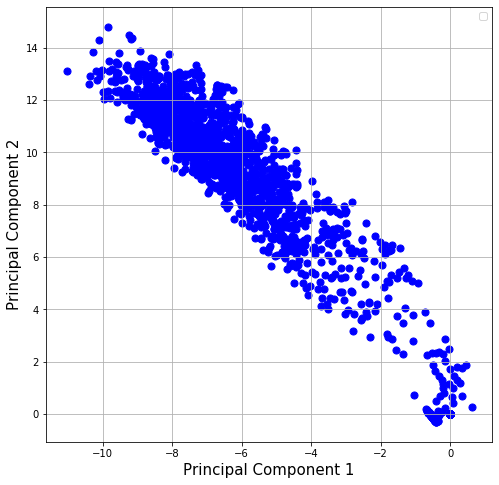

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD

# make a list of embeddings like this: [ALL_CRICKET_BAT_EMBEDDINGS,ALL_MAMMAL_BAT_EMBEDDINGS,AVERAGE_CRICKET_BAT_EMBEDDING,AVERAGE_MAMMAL_BAT_EMBEDDING,ALL_TEST_BAT_EMBEDDINS]
vec_all = [*np.reshape(cricketbats_vector, (-1, 768)), *np.reshape(vampirebats_vector, (-1, 768)), *np.reshape(cricketbats_vector_norm, (-1, 768)), *np.reshape(vampirebats_vector_norm, (-1, 768)), *np.reshape(test_cases_vector, (-1, 768))]
pca = TruncatedSVD(n_components=2)
principalComponents = pca.fit_transform(vec_all)
print(pca.explained_variance_ratio_)
principalDf = pd.DataFrame(data=principalComponents
                           , columns=['principal component 1', 'principal component 2'])



# make a colors list. use "b" for CRICKET_BATs, "r" for MAMMAL_BATs
colors =['b', 'r']

#extract pc1 and pc2 for document bats
pc1_document=[principalDf['principal component 1'][:49*128]]
pc2_document=[principalDf['principal component 2'][:49*128]]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
for pc1, pc2, color in zip( pc1_document,pc2_document, colors):
    ax.scatter(pc1, pc2, s=50, color=color)
ax.legend()
ax.grid()
plt.show()

It seems that despite this considerable compression, the clusters are distinguishable. Now, for the last part, visualize the average vectors and the test case vectors.

No handles with labels found to put in legend.


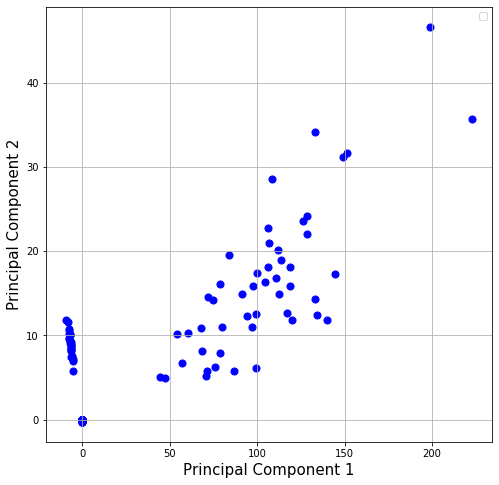

In [85]:
#extract pc1 and pc2 for average and test bats
pc1_remainings=[principalDf['principal component 1'][49*128:]]
pc2_remainings=[principalDf['principal component 2'][49*128:]]

colors =["b","r","m","m","c","c","m"]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
for pc1, pc2, color in zip( pc1_remainings,pc2_remainings, colors):
    ax.scatter(pc1, pc2, s=50, color=color)
ax.legend()
ax.grid()
plt.show()

# Submission

Congratulations! You finished the assignment & you're ready to submit your work. Please follow the instruction:

1. Check and review your answers. Make sure all of the cell outputs are what you want. 
2. Select File > Save.
3. Run **Create Submission** cell, It may take several minutes and it may ask you for your credential.
4. Run **Download Submission** cell to obtain your submission as a zip file.
5. Grab downloaded file (`dl_asg03__xx__xx.zip`) and submit it via [https://forms.gle/W8AMoNffho8TQLB87](https://forms.gle/W8AMoNffho8TQLB87).

**Note: ** We need your Github token to create (if doesn't exist previously) new repository to store learned model data. Also Google Drive token enables us to download the current notebook & create a submission. If you are interested feel free to check our code.

## Create Submission (Run the cell)

In [0]:
#@title
! pip install -U --quiet PyDrive > /dev/null
! wget -q https://github.com/github/hub/releases/download/v2.10.0/hub-linux-amd64-2.10.0.tgz 
  
import os
import time
import yaml
import json

from google.colab import files
from IPython.display import Javascript
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

asg_name = 'assignment_03'
script_save = '''
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});
'''
repo_name = 'iust-deep-learning-assignments'
submission_file_name = 'dl_asg03__%s__%s.zip'%(student_id, student_name.lower().replace(' ',  '_'))

! tar xf hub-linux-amd64-2.10.0.tgz
! cd hub-linux-amd64-2.10.0/ && chmod a+x install && ./install
! hub config --global hub.protocol https
! hub config --global user.email "$Your_Github_account_Email"
! hub config --global user.name "$student_name"
! hub api --flat -X GET /user
! hub api -F affiliation=owner -X GET /user/repos > repos.json

repos = json.load(open('repos.json'))
repo_names = [r['name'] for r in repos]
has_repository = repo_name in repo_names
if not has_repository:
  get_ipython().system_raw('! hub api -X POST -F name=%s /user/repos > repo_info.json' % repo_name)
  repo_info = json.load(open('repo_info.json')) 
  repo_url = repo_info['clone_url']
else:
  for r in repos:
    if r['name'] == repo_name:
      repo_url = r['clone_url']
  
stream = open("/root/.config/hub", "r")
token = list(yaml.load_all(stream))[0]['github.com'][0]['oauth_token']
repo_url_with_token = 'https://'+token+"@" +repo_url.split('https://')[1]

! git clone "$repo_url_with_token"
! cp -r "$ASSIGNMENT_PATH" "$repo_name"/
! cd "$repo_name" && git add -A
! cd "$repo_name" && git commit -m "Add assignment 03 results"
! cd "$repo_name" && git push -u origin master

sub_info = {
    'student_id': student_id,
    'student_name': student_name, 
    'repo_url': repo_url,
    'asg_dir_contents': os.listdir(str(ASSIGNMENT_PATH)),
    'dateime': str(time.time()),
    'asg_name': asg_name
}
json.dump(sub_info, open('info.json', 'w'))

Javascript(script_save)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = drive.ListFile({'q':"title='%s.ipynb'"%asg_name}).GetList()[0]['id']
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('%s.ipynb'%asg_name) 

! jupyter nbconvert --to script "$asg_name".ipynb > /dev/null
! jupyter nbconvert --to html "$asg_name".ipynb > /dev/null
! zip "$submission_file_name" "$asg_name".ipynb "$asg_name".html "$asg_name".txt info.json > /dev/null

print("##########################################")
print("Done! Submisson created, Please download using the bellow cell!")

github.com username: amnikoo
github.com password for amnikoo (never stored): 
.login	amnikoo
.id	41013033
.node_id	MDQ6VXNlcjQxMDEzMDMz
.avatar_url	https://avatars1.githubusercontent.com/u/41013033?v=4
.gravatar_id	
.url	https://api.github.com/users/amnikoo
.html_url	https://github.com/amnikoo
.followers_url	https://api.github.com/users/amnikoo/followers
.following_url	https://api.github.com/users/amnikoo/following{/other_user}
.gists_url	https://api.github.com/users/amnikoo/gists{/gist_id}
.starred_url	https://api.github.com/users/amnikoo/starred{/owner}{/repo}
.subscriptions_url	https://api.github.com/users/amnikoo/subscriptions
.organizations_url	https://api.github.com/users/amnikoo/orgs
.repos_url	https://api.github.com/users/amnikoo/repos
.events_url	https://api.github.com/users/amnikoo/events{/privacy}
.received_events_url	https://api.github.com/users/amnikoo/received_events
.type	User
.site_admin	false
.name	
.company	
.blog	
.location	
.email	
.hireable	
.bio	
.public_repos	2
.

## Download Submission (Run the cell)

In [0]:
#@title
files.download(submission_file_name)

If that cell makes an error when running you can download file dl_asg03_your_struden_id_your_name.zip from left panel and files section by right-clicking on it and choosing download button.

# Special Thanks

Special thanks to Amirhossein Kazemnejad and Kiamehr Razaee for creating the template of deep learning course assignments.